# New Notebook

In [1]:
#import necessary modules
import yahoo_finance as yfin
import pandas as pd
import pandas_datareader.data as web
import datetime
import csv
import math
import pandas_datareader.data as data
from yahoo_finance import Share
from pandas_datareader.yahoo.quotes import _yahoo_codes
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import time
%matplotlib inline
import random
import pickle
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [2]:
#get a dataframe of financials for the S&P 500. Put it in a local csv and read it that way from now on

#not necessary anymore
#new_data=pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents-financials.csv')
#new_data.to_csv('s&p500.csv')

#s&p data
new_data=pd.read_csv('s&p500.csv')
#adjusted close price data--can we drop this one out of the whole study since we're limiting to s&p now?
stockHistory=pd.read_csv('WilshireHist.csv')

In [3]:
sectordf=new_data.set_index('Symbol')

In [4]:
# sectordf

In [5]:
# sectordf.loc['MMM']['Sector']

In [6]:
# fruitless
# for i in range(len(new_data['Symbol'])):
#    print stockHistory[new_data['Symbol'][i]]

In [7]:
#make a list of all the market caps

# THE FOLLOWING IS NO LONGER NECESSARY SINCE WE HAVE THESE SAVED IN PICKLE
# mylist=[]
# for x in range(len(new_data)):
#     mylist.append(Share(new_data['Symbol'][x]).get_market_cap()) #mylist.append(new_data['Symbol'][x])#

In [8]:
#Unpickling the list of all market caps (to avoid having to use the internet whenever carrying out statistical analysis)

#Put the following into a file

#with open("test.txt", "wb") as fp:   #Pickling
#    pickle.dump(mylist, fp)

with open("test.txt", "rb") as fp:   # Unpickling
    mylist = pickle.load(fp)

In [9]:
len(mylist)

505

In [10]:
#stockHistory.columns

In [11]:
# ls_key = 'Adj Close'
# start = datetime.datetime(2004,1,1)
# end = datetime.datetime(2016,12,31)
# f = data.DataReader(new_data['Symbol'], 'yahoo',start,end)

# cleanData = f.ix[ls_key]
# dataFrame = pd.DataFrame(cleanData)

# print dataFrame[:]

In [12]:
#dataFrame.to_csv('s&phist.csv')
dataFrame=pd.read_csv('s&phist.csv')

In [13]:
#change the index to date. Now the two dataframes each contain info on 505 companies
dataFrame.set_index('Date')

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,18.442521,NaN,25.954398,1.378514,NaN,11.482295,13.767639,20.798770,19.518398,33.114265,...,29.240683,29.218492,20.833227,7.305467,NaN,22.700001,9.529809,66.822603,50.820666,NaN
2004-01-05,18.922795,NaN,25.718507,1.436168,NaN,11.871418,13.767639,21.392562,19.867833,34.133944,...,30.182217,29.901671,20.488106,7.429106,NaN,23.450001,9.669076,66.221203,50.710919,NaN
2004-01-06,19.518334,NaN,26.177538,1.430985,NaN,11.822511,13.667511,21.143812,19.887801,34.900510,...,29.992392,29.700311,20.520753,7.563497,NaN,23.620001,9.958977,65.896632,51.411604,NaN
2004-01-07,19.768077,NaN,26.999970,1.463375,NaN,11.937334,13.811813,20.662358,19.694549,35.247637,...,29.696265,29.484571,20.413485,7.590375,NaN,23.834999,9.788447,66.631685,51.057040,NaN
2004-01-08,20.670992,NaN,26.285920,1.513256,NaN,11.879923,13.405410,19.972275,18.975479,35.876800,...,30.964297,29.412659,20.544071,7.611877,NaN,24.290001,9.816868,67.920405,51.327183,NaN
2004-01-09,20.523708,NaN,26.254043,1.489935,NaN,11.826764,13.231658,20.237074,18.536047,35.305490,...,30.713729,28.973985,20.506762,7.504365,NaN,24.059999,9.706023,67.634019,50.677151,NaN
2004-01-12,20.747837,NaN,26.566441,1.537224,NaN,11.748089,13.087356,20.790746,18.655893,36.368561,...,32.247517,29.383893,20.273572,7.541994,NaN,24.870001,9.805500,67.634019,50.212843,NaN
2004-01-13,20.645377,NaN,26.713074,1.562488,NaN,11.514191,13.156946,18.182875,18.571001,36.223925,...,30.379634,29.254448,20.077691,7.391477,NaN,24.400000,9.708866,66.784418,49.664117,NaN
2004-01-14,20.581342,NaN,26.840585,1.567671,NaN,11.748089,13.177675,19.009370,18.551029,36.665063,...,31.070598,29.254448,19.961096,7.391477,NaN,24.195000,9.833922,66.832151,49.799188,NaN


In [14]:
datesSaved=dataFrame['Date'] #make a temporary storage space

In [15]:
del dataFrame['Date'] #get rid of the extra column, which stuck around after we set it as the index

In [16]:
dataFrame=dataFrame.set_index(datesSaved)

In [17]:
dataFrame.columns

Index([u'A', u'AAL', u'AAP', u'AAPL', u'ABBV', u'ABC', u'ABT', u'ACN', u'ADBE',
       u'ADI',
       ...
       u'XLNX', u'XOM', u'XRAY', u'XRX', u'XYL', u'YHOO', u'YUM', u'ZBH',
       u'ZION', u'ZTS'],
      dtype='object', length=505)

In [18]:
updown=dataFrame.shift(periods=1)
# updown

In [19]:
#######CHECK TO MAKE SURE YOU DID SUBTRACTION FROM LAST MONTH'S AVERAGES######

In [20]:
posneg=pd.DataFrame(dataFrame>updown)
# posneg

In [21]:
# I think I didn't ultimately use these
# a=posneg.columns
# b=list(a)
# c=random.sample(b, 50)

In [22]:
#read in the trends for the first hundred or so s&p500 companies--*scale up from here**
trends=pd.read_csv('sp2.csv')

In [23]:
# I think this cell is unnecessary
#dataFrame['dates']=dataFrame.index

In [24]:
dataFrame.index=dataFrame.index.to_datetime() #change the index types to datetime so that we can get monthly averages

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


In [25]:
# tests and stuff!
# type(dataFrame['dates'][1])
# dataFrame.index[1]

In [26]:
#the easy way
avgMonthly=dataFrame.resample("M").mean()

In [27]:
#More steps, but also makes sense. I commented it out since the above already accomplished it

z1=pd.groupby(dataFrame,by=[dataFrame.index.month,dataFrame.index.year])
z2=dataFrame.groupby(pd.TimeGrouper(freq='M'))
z1
z3=z2.mean()

In [28]:
# I think this part failed. I still don't understand 'lambda'
#dataFrame['normed'] = dataFrame.groupby(grouper).transform(lambda x: x/x.mean())

In [29]:
trendsdated=trends.set_index('Month')
trendsdatedsig=trendsdated==100
# trendsdatedsig

In [30]:
#These two are the same. From here on, I am replacing every instance of z3 with avgMonthly to simplify this code
# z3
# avgMonthly

In [31]:
avgMonthlyShifted=avgMonthly.shift(periods=1)
# avgMonthlyShifted

In [32]:
priceRise=avgMonthly>avgMonthlyShifted # I think these were z5 and z6 before. Figure this out.
priceFall=avgMonthly<avgMonthlyShifted

In [33]:
priceRise=priceRise*1

In [34]:
priceFall=priceFall*-1

In [35]:
#priceFall #I should check why I am getting so many 0s in here. Are there missing values? How is it handling those?
###########^nevermind, I misspoke. These are not the ups and downs together. COmbine them and you'll see
#priceRise

In [36]:
binCombine=priceRise+priceFall
# binCombine

In [37]:
binCombine.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.121795,0.044872,0.301282,0.339744,0.057692,0.250000,0.224359,0.250000,0.211538,0.185897,...,0.173077,0.211538,0.211538,0.147436,0.089744,0.044872,0.198718,0.121795,0.044872,0.051282
std,0.992507,0.932170,0.953228,0.940122,0.547609,0.968038,0.974340,0.968038,0.977222,0.982456,...,0.984810,0.977222,0.977222,0.989001,0.626014,0.998986,0.979927,0.992507,0.998986,0.542335
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#scale down to the sample size
trendsDatedSigSample=trendsdatedsig.filter(list(binCombine.columns), axis=1)
# trendsDatedSigSample

In [39]:
#trendsdatedsig.index
trendsdatedsig

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-02,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2004-03,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
2004-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-07,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# get rid of January and February 2017 to have the dfs match
trendsDatedSigRedated=trendsdatedsig.drop(trendsdatedsig.index[[156,157]])

In [41]:
#trendsdatedsig.index[0]==binCombine.index[0]

In [42]:
# just set the indices as the same thing
trendsDatedSigRedated.index=binCombine.index
# binCombine.index

In [43]:
# dtix=z5.index.to_datetime()

In [44]:
#What the heck was I doing here?

In [45]:
# dtix[0]

In [46]:
# z5.index[0]

In [47]:
# z7=z6.reset_index()

In [48]:
# z7.set_index

In [49]:
# trends2=trendsdatedsig.reset_index()

In [50]:
# trends2

In [51]:
# trends3=pd.DataFrame(trends2.values[:-2], columns=trends2.columns)

In [52]:
# trends3

In [53]:
# z8=pd.DataFrame(z7.values[:-2], columns=z7.columns)

In [54]:
# trends3

In [55]:
# trends4['SCHW']

In [56]:
# z9=z8.set_index('Month')

In [57]:
# trends4=trends3.set_index('Month')

In [58]:
# goodnewsonlyup=z9.multiply(trends4)

In [59]:
# goodnewsonlyup.to_csv('goodnews.csv')

In [60]:
# made a list of all of the real caps because yahoo did not give floats, but strings with letters
# capsreal=[]
# for i in range(len(mylist)):
#     if type(mylist[i])!=str:
#         capsreal.append(None)
#     if type(mylist[i])==str:
#         if mylist[i][-1]=='B':
#             capsreal.append(1000000000*float(mylist[i][:-1]))
#         elif mylist[i][-1]=='M':
#             capsreal.append(1000000*float(mylist[i][:-1]))
# capsreal

In [61]:
# For future robustness, we will just open it up with pickle:
# with open("capsreal.txt", "wb") as fp:   #Pickling
#     pickle.dump(capsreal, fp)

with open("capsreal.txt", "rb") as fp:   # Unpickling
    capsreal = pickle.load(fp)

In [62]:
capscorresp=pd.DataFrame(new_data['Symbol'])

In [63]:
capscorresp['cap']=capsreal

In [64]:
ted=capscorresp.T

In [65]:
ted.columns=ted.values[0]

In [66]:
# ted.values
# ted

In [67]:
# I think this part is now unnecessary
# goodnewsonlyupcap=goodnewsonlyup.multiply(ted)
# goodnewsonlyupcap

In [68]:
# myindex=trends3['Month']

In [69]:
# bincombineixed=bincombine.set_index(myindex)

In [70]:
# del trends['Month']

In [71]:
results=trendsDatedSigRedated.multiply(binCombine)#[trends.columns]

In [72]:
results

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-02-29,1,0,0,0,0,1,0,NaN,0,0,...,1,0,0,1,0,0,0,0,0,0
2004-03-31,0,0,0,0,0,0,0,NaN,0,-1,...,0,0,1,0,0,0,0,0,0,0
2004-04-30,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,1,1,0,0
2004-05-31,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-06-30,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-07-31,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-08-31,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-09-30,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-10-31,0,0,0,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#del results['CHTR'] #might need this later

In [74]:
results=results.dropna(axis='columns') #drop any columns for companies that were not sampled

In [75]:
#not yet robust to internet!
capsofsample=[]
for x in range(len(results.columns)):
    capsofsample.append(Share(results.columns[x]).get_market_cap())

In [76]:
capsrealofsample=[]
for i in range(len(capsofsample)):
    if type(mylist[i])!=str:
        capsrealofsample.append(None)
    if type(capsofsample[i])==str:
        if capsofsample[i][-1]=='B':
            capsrealofsample.append(1000000000*float(capsofsample[i][:-1]))
        elif mylist[i][-1]=='M':
            capsrealofsample.append(1000000*float(capsofsample[i][:-1]))
# capsrealofsample

In [77]:
#make binary columns for all of the sectors

def binSector(sector):
    binlist=[]
    for i in range(len(results.columns)):
        if sectordf.loc[results.columns[i]]['Sector']==sector:
            binlist.append(1)
        else:
            binlist.append(0)
    #Series=pd.Series(data=binlist)
    return binlist

# binSector('Financials')
# binSector('Consumer Discretionary')
# binSector('Industrials')
# binSector('Information Technology')
# binSector('Health Care')
# binSector('Energy')
# binSector('Consumer Staples')
# binSector('Utilities')
# binSector('Materials')
# binSector('Telecommunications Services')

In [78]:
finalframe=pd.DataFrame(results.sum())

In [79]:
finalframe['caps']=capsrealofsample #now add more columns to see if good news is correlated with anything else instead
#add all of the different sectors, then make a correlation matrix

In [80]:
finalframe.columns={'sentiment', 'caps'}

In [81]:
finalframe['logcaps']=np.log(finalframe['caps'])

In [82]:
finalframe['Financials']=binSector('Financials')
finalframe['Consumer Discretionary']=binSector('Consumer Discretionary')
finalframe['Industrials']=binSector('Industrials')
finalframe['Information Technology']=binSector('Information Technology')
finalframe['Health Care']=binSector('Health Care')
finalframe['Energy']=binSector('Energy')
finalframe['Consumer Staples']=binSector('Consumer Staples')
finalframe['Utilities']=binSector('Utilities')
finalframe['Materials']=binSector('Materials')
finalframe['Telecommunications Services']=binSector('Telecommunications Services')

In [83]:
finalframe

,sentiment,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
A,1,1.766000e+10,23.594568,0,0,0,0,1,0,0,0,0,0
AAL,-1,2.032000e+10,23.734871,0,0,1,0,0,0,0,0,0,0
AAP,1,1.121000e+10,23.140072,0,1,0,0,0,0,0,0,0,0
AAPL,1,7.309700e+11,27.317638,0,0,0,1,0,0,0,0,0,0
ABBV,1,1.050900e+11,25.378083,0,0,0,0,1,0,0,0,0,0
ABC,2,1.930000e+10,23.683371,0,0,0,0,1,0,0,0,0,0
ABT,0,7.772000e+10,25.076378,0,0,0,0,1,0,0,0,0,0
ADBE,-2,5.995000e+10,24.816777,0,0,0,1,0,0,0,0,0,0
ADI,-1,2.572000e+10,23.970535,0,0,0,1,0,0,0,0,0,0
ADM,1,2.559000e+10,23.965467,0,0,0,0,0,0,1,0,0,0


In [84]:
finalframe.describe()

,sentiment,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
count,449.000000,4.470000e+02,447.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,0.142539,4.333812e+10,23.888103,0.133630,0.155902,0.133630,0.131403,0.129176,0.073497,0.080178,0.051225,0.051225,0.011136
std,0.931681,6.955106e+10,1.004043,0.340634,0.363167,0.340634,0.338218,0.335769,0.261241,0.271872,0.220702,0.220702,0.105054
min,-2.000000,2.770000e+09,21.742113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,1.158000e+10,23.172544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.053000e+10,23.745153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.239500e+10,24.470293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,7.309700e+11,27.317638,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
finalframe.corr(method='pearson')

,sentiment,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
sentiment,1.000000,0.046873,0.057824,-0.123453,0.046326,0.059416,-0.059572,0.005228,-0.024796,0.078153,-0.013878,0.051255,-0.039059
caps,0.046873,1.000000,0.794548,-0.009059,-0.055235,-0.056802,0.141683,0.025806,-0.015444,0.072158,-0.070719,-0.054067,0.086081
logcaps,0.057824,0.794548,1.000000,0.009495,-0.127932,-0.049343,0.107629,0.080657,-0.049220,0.146169,-0.064233,-0.039085,0.035053
Financials,-0.123453,-0.009059,0.009495,1.000000,-0.168784,-0.154242,-0.152755,-0.151261,-0.110614,-0.115952,-0.091256,-0.091256,-0.041677
Consumer Discretionary,0.046326,-0.055235,-0.127932,-0.168784,1.000000,-0.168784,-0.167156,-0.165522,-0.121043,-0.126884,-0.099859,-0.099859,-0.045606
Industrials,0.059416,-0.056802,-0.049343,-0.154242,-0.168784,1.000000,-0.152755,-0.151261,-0.110614,-0.115952,-0.091256,-0.091256,-0.041677
Information Technology,-0.059572,0.141683,0.107629,-0.152755,-0.167156,-0.152755,1.000000,-0.149803,-0.109548,-0.114834,-0.090376,-0.090376,-0.041275
Health Care,0.005228,0.025806,0.080657,-0.151261,-0.165522,-0.151261,-0.149803,1.000000,-0.108477,-0.113711,-0.089492,-0.089492,-0.040871
Energy,-0.024796,-0.015444,-0.049220,-0.110614,-0.121043,-0.110614,-0.109548,-0.108477,1.000000,-0.083155,-0.065444,-0.065444,-0.029888
Consumer Staples,0.078153,0.072158,0.146169,-0.115952,-0.126884,-0.115952,-0.114834,-0.113711,-0.083155,1.000000,-0.068602,-0.068602,-0.031331


In [86]:
finalframe.cov() #csx: try using a lag--lag because the trends might not be reflected until later

,sentiment,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
sentiment,8.680301e-01,3.036122e+09,5.406963e-02,-3.917933e-02,1.567471e-02,1.885639e-02,-1.877187e-02,1.635579e-03,-6.035237e-03,1.979598e-02,-2.853563e-03,1.053929e-02,-3.822980e-03
caps,3.036122e+09,4.837350e+21,5.548508e+10,-2.150163e+08,-1.397710e+09,-1.348267e+09,3.339195e+09,5.948099e+08,-2.811838e+08,1.367214e+09,-1.087840e+09,-8.316968e+08,6.303574e+08
logcaps,5.406963e-02,5.548508e+10,1.008102e+00,3.253404e-03,-4.673367e-02,-1.690778e-02,3.661853e-02,2.683842e-02,-1.293694e-02,3.998151e-02,-1.426393e-02,-8.679469e-03,3.705547e-03
Financials,-3.917933e-02,-2.150163e+08,3.253404e-03,1.160317e-01,-2.087973e-02,-1.789691e-02,-1.759863e-02,-1.730035e-02,-9.843303e-03,-1.073815e-02,-6.860484e-03,-6.860484e-03,-1.491409e-03
Consumer Discretionary,1.567471e-02,-1.397710e+09,-4.673367e-02,-2.087973e-02,1.318903e-01,-2.087973e-02,-2.053174e-02,-2.018374e-02,-1.148385e-02,-1.252784e-02,-8.003898e-03,-8.003898e-03,-1.739978e-03
Industrials,1.885639e-02,-1.348267e+09,-1.690778e-02,-1.789691e-02,-2.087973e-02,1.160317e-01,-1.759863e-02,-1.730035e-02,-9.843303e-03,-1.073815e-02,-6.860484e-03,-6.860484e-03,-1.491409e-03
Information Technology,-1.877187e-02,3.339195e+09,3.661853e-02,-1.759863e-02,-2.053174e-02,-1.759863e-02,1.143911e-01,-1.701201e-02,-9.679248e-03,-1.055918e-02,-6.746142e-03,-6.746142e-03,-1.466553e-03
Health Care,1.635579e-03,5.948099e+08,2.683842e-02,-1.730035e-02,-2.018374e-02,-1.730035e-02,-1.701201e-02,1.127406e-01,-9.515192e-03,-1.038021e-02,-6.631801e-03,-6.631801e-03,-1.441696e-03
Energy,-6.035237e-03,-2.811838e+08,-1.293694e-02,-9.843303e-03,-1.148385e-02,-9.843303e-03,-9.679248e-03,-9.515192e-03,6.824690e-02,-5.905982e-03,-3.773266e-03,-3.773266e-03,-8.202752e-04
Consumer Staples,1.979598e-02,1.367214e+09,3.998151e-02,-1.073815e-02,-1.252784e-02,-1.073815e-02,-1.055918e-02,-1.038021e-02,-5.905982e-03,7.391425e-02,-4.116290e-03,-4.116290e-03,-8.948457e-04


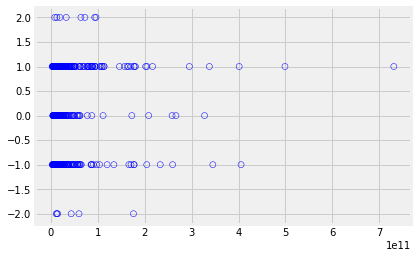

In [87]:
#scatter
plt.scatter(  x=finalframe.caps, y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )
# xlabel('Tobacco')
# ylabel('Alcohol')
# savefig('alcohol_v_tobacco.png', fmt='png', dpi=100)

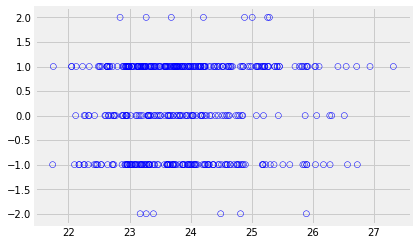

In [88]:
#Log scatter
plt.scatter(  x=finalframe.logcaps, y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

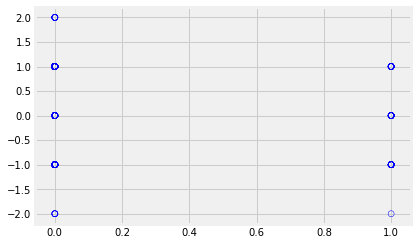

In [89]:
#Financials scatter
plt.scatter(  x=finalframe.Financials, y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

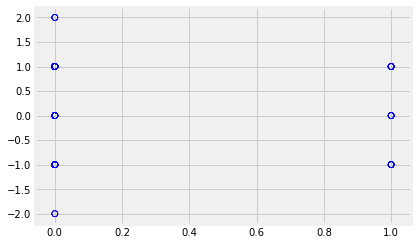

In [90]:
#Consumer Discretionary scatter
plt.scatter(  x=finalframe['Consumer Discretionary'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

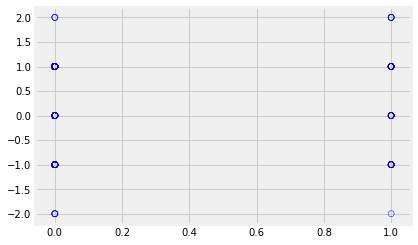

In [91]:
#Industrials scatter
plt.scatter(  x=finalframe.Industrials, y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

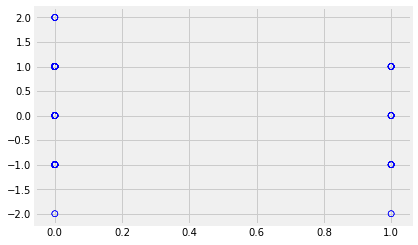

In [92]:
#IT scatter
plt.scatter(  x=finalframe['Information Technology'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

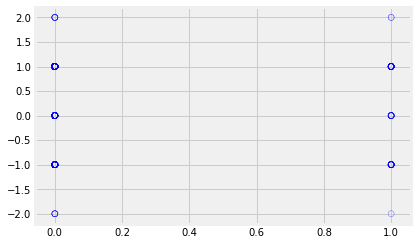

In [93]:
#Health Care scatter
plt.scatter(  x=finalframe['Health Care'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=.5 )

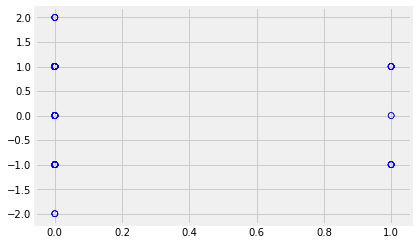

In [94]:
#Energy scatter
plt.scatter(  x=finalframe['Energy'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

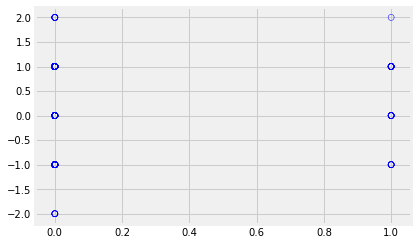

In [95]:
#Consumer Staples scatter
plt.scatter(  x=finalframe['Consumer Staples'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

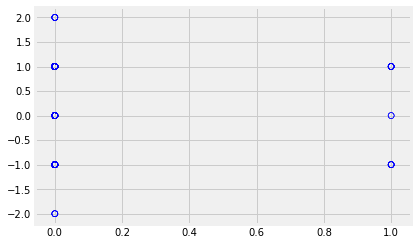

In [96]:
#Utilities scatter
plt.scatter(  x=finalframe['Utilities'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

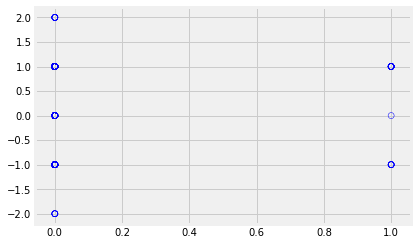

In [97]:
#Materials scatter
plt.scatter(  x=finalframe['Materials'], y=finalframe.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

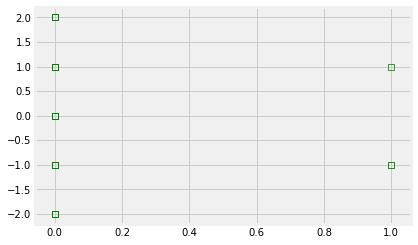

In [98]:
#Telecom scatter
plt.scatter(  x=finalframe['Telecommunications Services'], y=finalframe.sentiment,
         marker='s',
         edgecolor='g',
         facecolor='none',
         alpha=1 )

In [158]:
fncl = finalframe[finalframe.Financials != 0]
fncl=fncl.iloc[:,0:3]
cdsc = finalframe[finalframe['Consumer Discretionary'] != 0]
cdsc=cdsc.iloc[:,0:3]
idu = finalframe[finalframe.Industrials != 0]
idu=idu.iloc[:,0:3]
it = finalframe[finalframe['Information Technology'] != 0]
it=it.iloc[:,0:3]
hlc = finalframe[finalframe['Health Care'] != 0]
hlc=hlc.iloc[:,0:3]
nrg = finalframe[finalframe.Energy != 0]
nrg=nrg.iloc[:,0:3]
csta = finalframe[finalframe['Consumer Staples'] != 0]
csta=csta.iloc[:,0:3]
uty = finalframe[finalframe['Utilities'] != 0]
uty=uty.iloc[:,0:3]
mat = finalframe[finalframe.Materials != 0]
mat=mat.iloc[:,0:3]
tele = finalframe[finalframe['Telecommunications Services'] != 0]
tele=tele.iloc[:,0:3]

In [160]:
fncl.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.070888,-0.038905
caps,0.070888,1.000000,0.827905
logcaps,-0.038905,0.827905,1.000000


In [161]:
cdsc.corr()

,sentiment,caps,logcaps
sentiment,1.000000,-0.068386,0.110115
caps,-0.068386,1.000000,0.826818
logcaps,0.110115,0.826818,1.000000


In [162]:
idu.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.09918,0.128433
caps,0.099180,1.00000,0.849650
logcaps,0.128433,0.84965,1.000000


In [163]:
it.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.156157,0.018586
caps,0.156157,1.000000,0.801432
logcaps,0.018586,0.801432,1.000000


In [164]:
hlc.corr()

,sentiment,caps,logcaps
sentiment,1.000000,-0.041605,0.037064
caps,-0.041605,1.000000,0.848730
logcaps,0.037064,0.848730,1.000000


In [165]:
nrg.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.133315,0.145411
caps,0.133315,1.000000,0.801536
logcaps,0.145411,0.801536,1.000000


In [166]:
csta.corr()

,sentiment,caps,logcaps
sentiment,1.000000,-0.027518,-0.022163
caps,-0.027518,1.000000,0.936838
logcaps,-0.022163,0.936838,1.000000


In [167]:
uty.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.038199,0.111639
caps,0.038199,1.000000,0.944027
logcaps,0.111639,0.944027,1.000000


In [168]:
mat.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.229610,0.097905
caps,0.229610,1.000000,0.935346
logcaps,0.097905,0.935346,1.000000


In [169]:
tele.corr()

,sentiment,caps,logcaps
sentiment,1.000000,0.021566,-0.155181
caps,0.021566,1.000000,0.934980
logcaps,-0.155181,0.934980,1.000000


In [115]:
fncl

,sentiment,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
AAP,1,1.121000e+10,23.140072,0,1,0,0,0,0,0,0,0,0
AMZN,-1,4.054200e+11,26.728189,0,1,0,0,0,0,0,0,0,0
AN,1,4.520000e+09,22.231778,0,1,0,0,0,0,0,0,0,0
AZO,1,2.050000e+10,23.743691,0,1,0,0,0,0,0,0,0,0
BBBY,-1,5.780000e+09,22.477670,0,1,0,0,0,0,0,0,0,0
BBY,1,1.381000e+10,23.348659,0,1,0,0,0,0,0,0,0,0
BWA,1,2.012000e+10,23.724980,0,1,0,0,0,0,0,0,0,0
CBS,0,3.210000e+10,24.192122,0,1,0,0,0,0,0,0,0,0
CCL,-1,9.756000e+10,25.303733,0,1,0,0,0,0,0,0,0,0
CHTR,0,8.729000e+10,25.192502,0,1,0,0,0,0,0,0,0,0


In [118]:
# Scatter within industries

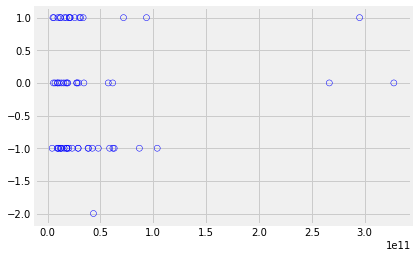

In [119]:
#scatter
plt.scatter(  x=fncl.caps, y=fncl.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

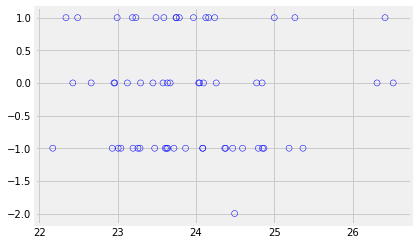

In [120]:
#scatter
plt.scatter(  x=fncl.logcaps, y=fncl.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

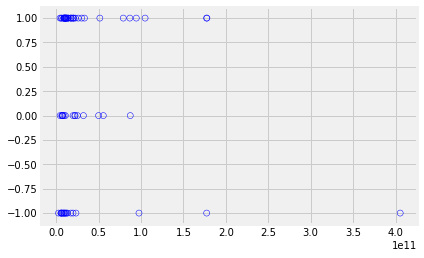

In [121]:
#scatter
plt.scatter(  x=cdsc.caps, y=cdsc.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

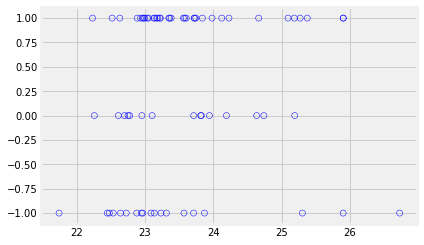

In [122]:
#scatter
plt.scatter(  x=cdsc.logcaps, y=cdsc.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

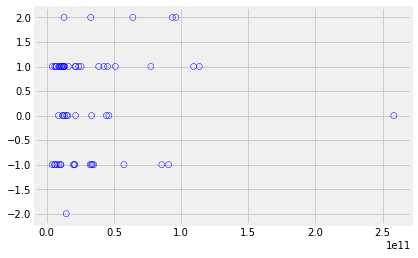

In [123]:
#scatter
plt.scatter(  x=idu.caps, y=idu.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

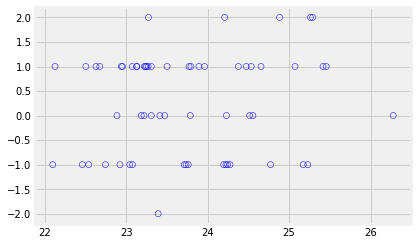

In [124]:
#scatter
plt.scatter(  x=idu.logcaps, y=idu.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

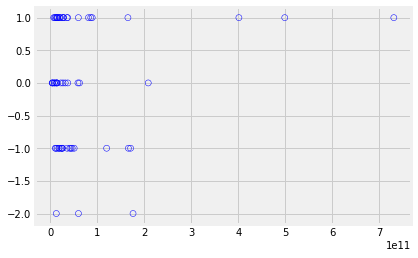

In [125]:
#scatter
plt.scatter(  x=it.caps, y=it.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

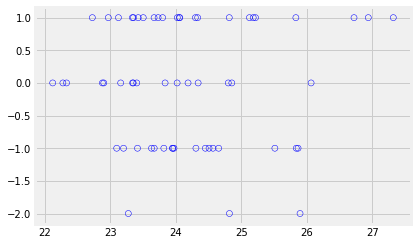

In [126]:
#scatter
plt.scatter(  x=it.logcaps, y=it.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

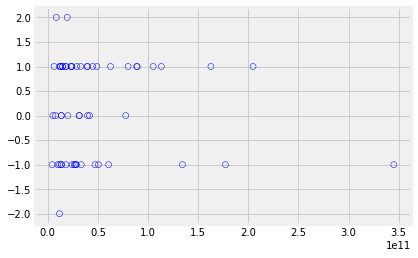

In [127]:
#scatter
plt.scatter(  x=hlc.caps, y=hlc.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

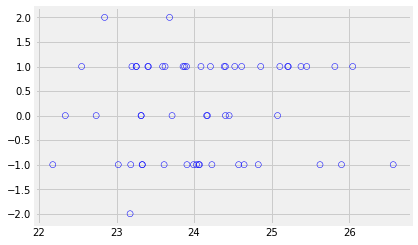

In [128]:
#scatter
plt.scatter(  x=hlc.logcaps, y=hlc.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

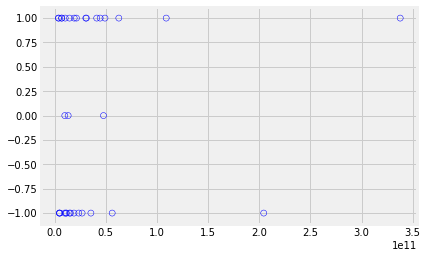

In [129]:
#scatter
plt.scatter(  x=nrg.caps, y=nrg.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

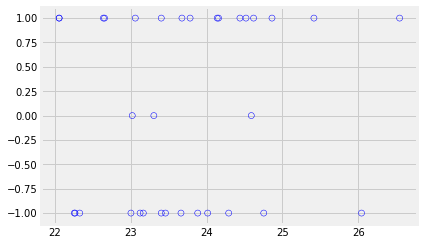

In [130]:
#scatter
plt.scatter(  x=nrg.logcaps, y=nrg.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

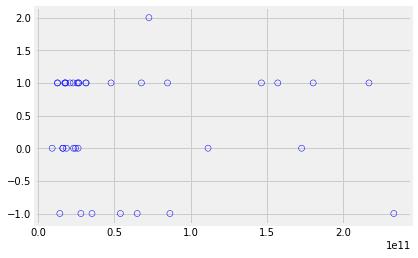

In [133]:
#scatter
plt.scatter(  x=csta.caps, y=csta.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

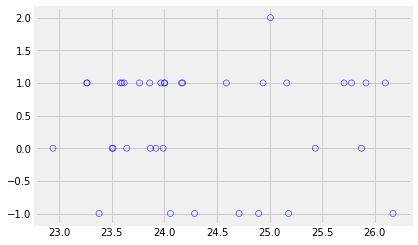

In [135]:
#scatter
plt.scatter(  x=csta.logcaps, y=csta.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

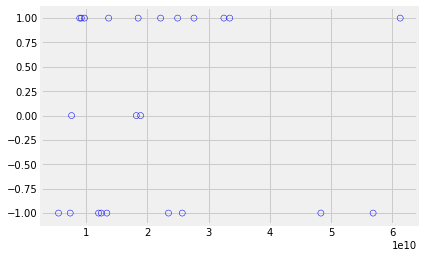

In [136]:
#scatter
plt.scatter(  x=uty.caps, y=uty.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

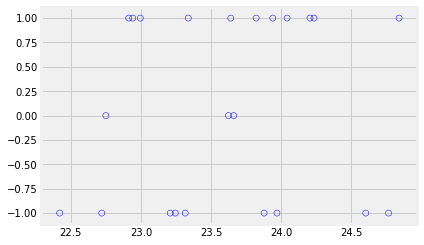

In [137]:
#scatter
plt.scatter(  x=uty.logcaps, y=uty.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

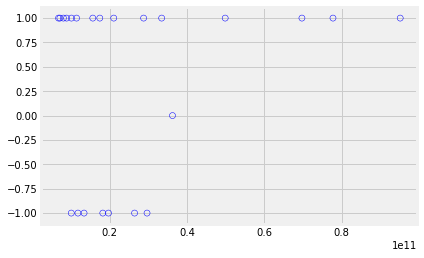

In [138]:
#scatter
plt.scatter(  x=mat.caps, y=mat.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

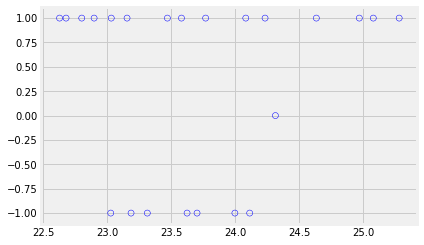

In [139]:
#scatter
plt.scatter(  x=mat.logcaps, y=mat.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

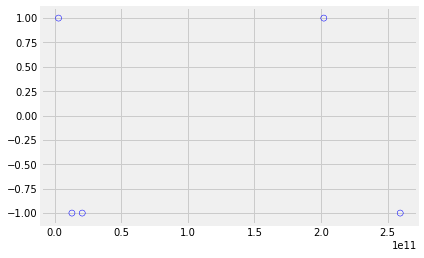

In [140]:
#scatter
plt.scatter(  x=tele.caps, y=tele.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

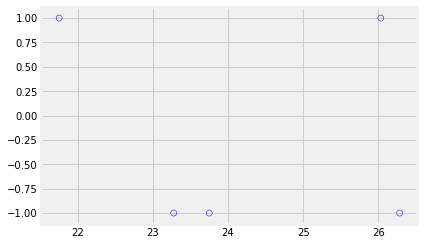

In [141]:
#scatter
plt.scatter(  x=tele.logcaps, y=tele.sentiment,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [144]:
finalframe.to_csv('correlationframe.csv')

In [83]:
# finalframe['caps']=capsreal

In [84]:
# finalframe.corr()

In [85]:
ratio.describe()

NameError: name 'ratio' is not defined

In [86]:
trendsclone=pd.read_csv('sp2.csv')

In [87]:
trendsclone=trendsclone.set_index('Month')

In [88]:
# trendsmax=trendsclone==100

In [89]:
# trendsmax

In [90]:
# maxes2=trendsmax.multiply(binCombine)

In [177]:
# maxes2

In [175]:
maxes2.sum().mean()

nan

In [217]:
stuff=(list(maxes2.describe().values[1]))

In [218]:
stuff2=[]
for x in range(len(stuff)):
    if str(stuff[x])!='nan':
        stuff2.append(stuff[x])

In [219]:
sum(stuff2)

0.05128205128205128

In [220]:
bincombine

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-02-29,1,0,0,-1,1,0,1,-1,-1,1,...,1,1,-1,1,0,-1,1,1,-1,0
2004-03-31,-1,0,0,-1,1,0,-1,-1,1,-1,...,-1,1,1,-1,0,-1,1,-1,-1,0
2004-04-30,-1,0,0,1,1,0,1,1,1,1,...,-1,1,1,1,0,1,1,1,-1,0
2004-05-31,-1,0,0,1,-1,0,1,1,-1,1,...,-1,1,1,-1,0,1,-1,1,1,0
2004-06-30,1,0,0,1,1,0,1,1,1,1,...,-1,1,1,1,0,1,1,1,1,0
2004-07-31,-1,0,0,-1,-1,0,-1,-1,-1,-1,...,-1,1,1,-1,0,-1,1,-1,1,0
2004-08-31,-1,0,0,-1,1,0,-1,1,-1,1,...,-1,1,-1,-1,0,-1,1,-1,-1,0
2004-09-30,1,0,0,1,1,0,1,1,1,1,...,-1,1,1,1,0,1,1,1,1,0


In [221]:
new_data['Market Cap']

0      107.43
1       61.54
2      103.77
3       71.66
4       30.48
5       11.51
6       48.23
7       12.10
8        8.12
9       41.02
10       7.47
11      30.01
12      14.80
13      31.19
14       9.90
15       7.38
16       9.39
17      12.91
18      27.87
19       6.68
20      95.17
21      11.84
22       9.21
23      26.08
24     492.80
25     484.45
26     136.59
27     351.89
28      12.90
29      17.37
        ...  
474    182.28
475     18.96
476     16.46
477    230.13
478     88.53
479     30.04
480     11.86
481    242.63
482     27.00
483     11.50
484      9.61
485      9.63
486     22.91
487     13.02
488     10.78
489     15.75
490     17.31
491     20.53
492      8.10
493      9.10
494     22.65
495      9.66
496     11.92
497      9.40
498      8.30
499     35.82
500     34.94
501     24.88
502      5.06
503     24.07
Name: Market Cap, dtype: float64

In [226]:
new_data['Sector'].value_counts()

Financials                     92
Consumer Discretionary         85
Industrials                    71
Information Technology         67
Health Care                    56
Energy                         37
Consumer Staples               36
Utilities                      28
Materials                      27
Telecommunications Services     5
Name: Sector, dtype: int64

In [227]:
qualdf=new_data

In [231]:
qualdf['Financials']=qualdf['Sector']=='Financials'
qualdf['Consumer Discretionary']=qualdf['Sector']=='Consumer Discretionary'
qualdf['Industrials']=qualdf['Sector']=='Industrials'
qualdf['Information Technology']=qualdf['Sector']=='Information Technology'
qualdf['Health Care']=qualdf['Sector']=='Health Care'
qualdf['Energy']=qualdf['Sector']=='Energy'
qualdf['Consumer Staples']=qualdf['Sector']=='Consumer Staples'
qualdf['Utilities']=qualdf['Sector']=='Utilities'
qualdf['Materials']=qualdf['Sector']=='Materials'
qualdf['Telecommunications Services']=qualdf['Sector']=='Telecommunications Services'

In [232]:
qualdf

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,...,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services
0,MMM,3M Company,Industrials,177.12,2.53,22.77,7.78,19.34,134.00,177.79,...,False,False,True,False,False,False,False,False,False,False
1,ABT,Abbott Laboratories,Health Care,41.89,2.55,25.79,1.62,14.10,36.00,51.74,...,False,False,False,False,True,False,False,False,False,False
2,ABBV,AbbVie,Health Care,64.16,3.60,19.29,3.33,2.87,45.45,71.60,...,False,False,False,False,True,False,False,False,False,False
3,ACN,Accenture plc,Information Technology,115.11,1.94,19.45,5.92,11.45,88.43,120.78,...,False,False,False,True,False,False,False,False,False,False
4,ATVI,Activision Blizzard,Information Technology,41.29,0.64,37.06,1.11,11.31,24.04,41.32,...,False,False,False,True,False,False,False,False,False,False
5,AYI,Acuity Brands Inc,Industrials,264.62,0.21,43.23,6.12,36.50,168.33,265.10,...,False,False,True,False,False,False,False,False,False,False
6,ADBE,Adobe Systems Inc,Information Technology,96.79,0.00,54.68,1.77,14.53,71.27,100.56,...,False,False,False,True,False,False,False,False,False,False
7,AAP,Advance Auto Parts,Consumer Discretionary,164.85,0.15,25.20,6.40,35.82,131.59,201.24,...,False,True,False,False,False,False,False,False,False,False
8,AES,AES Corp,Utilities,12.32,3.60,28.99,0.43,4.86,8.22,13.38,...,False,False,False,False,False,False,False,True,False,False
9,AET,Aetna Inc,Health Care,117.00,0.87,17.62,6.64,47.96,92.42,125.47,...,False,False,False,False,True,False,False,False,False,False
